<a href="https://colab.research.google.com/github/lesliee40/introduction-to-python/blob/master/TIC_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RGB Values**

Blue Lexus: 0, 31, 184 

Black Lexus: 8, 18, 20

White Lexus: 251, 255, 255 

https://drive.google.com/drive/folders/1xsFXeR3xiNCprwVpVOOVnHu0WjOpqwDa

# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import dependencies
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.display import display, Javascript, Image

from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes

#Get Python and OpenCV Version

print('OpenCV-Python Lib Version:', cv2.__version__)
print('Python Version:',sys.version)

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/black_lexus_1.jpeg \
    -O black_lexus_1.jpg

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/black_lexus_1.mp4 \
    -O black_lexus_1.mp4

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/black_lexus_2.jpeg \
    -O black_lexus_2.jpg

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/black_lexus_3.jpeg \
    -O black_lexus_3.jpg

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/blue_lexus_1.jpeg \
    -O blue_lexus_1.jpg

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/blue_lexus_1.mp4 \
    -O blue_lexus_1.mp4

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/blue_lexus_2.jpeg \
    -O blue_lexus_2.jpg

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/blue_lexus_3.jpeg \
    -O blue_lexus_3.jpg

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/blue_lexus_4.jpeg \
    -O blue_lexus_4.jpg

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/white_lexus_1.jpeg \
    -O white_lexus_1.jpeg

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/white_lexus_1.mp4 \
    -O white_lexus_1.mp4

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/white_lexus_2.jpeg \
    -O white_lexus_2.jpeg

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/white_lexus_3.jpeg \
    -O white_lexus_3.jpeg

!wget --no-check-certificate \
    https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/white_lexus_4.jpeg \
    -O white_lexus_4.jpeg

OpenCV-Python Lib Version: 4.6.0
Python Version: 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
--2022-11-01 18:39:19--  https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/black_lexus_1.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87519 (85K) [image/jpeg]
Saving to: ‘black_lexus_1.jpg’

black_lexus_1.jpg   100%[===================>]  85.47K  --.-KB/s    in 0.01s   

2022-11-01 18:39:20 (6.32 MB/s) - ‘black_lexus_1.jpg’ saved [87519/87519]

--2022-11-01 18:39:20--  https://raw.githubusercontent.com/22Bliss22/TIC-Images/master/black_lexus_1.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.

# Crop, binarise, detect circles from image, draw bounding box

DatatypeClass of Image: <class 'numpy.ndarray'>
Shape/Size of RGB Img: (480, 640, 3)


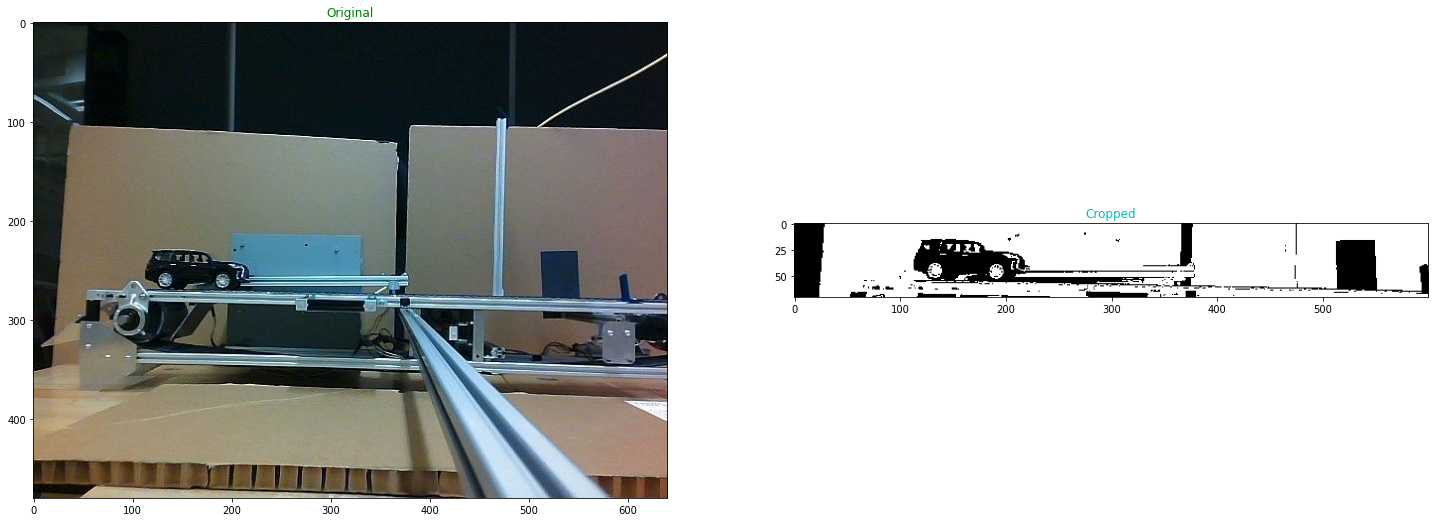

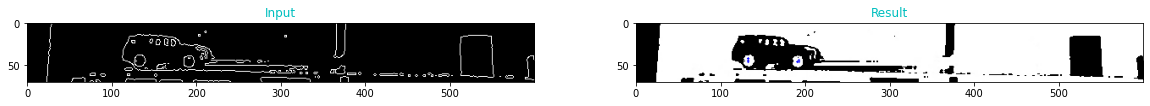

tensor([182,  36, 202,  56], dtype=torch.int32)
torch.Size([4])
torch.Size([1, 4])


(192, 46)

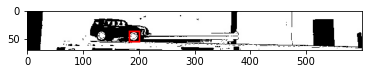

In [ ]:
def detect_circle(path_to_img):
    """
    Takes the image, crops off top and bottom, binarises, identifies circles 
    with Hough Circle Detector, finds coordinates of the circle with max x and 
    y values
    
    """
    #Print original image

    MainImgBGR = cv2.imread(path_to_img,cv2.IMREAD_UNCHANGED)

    print('DatatypeClass of Image:',type(MainImgBGR))
    print('Shape/Size of RGB Img:', MainImgBGR.shape)

    plt.figure(figsize=(25,10))
    #Note: matplotlib uses RGB format so had to convert BGR-to-RGB
    plt.imshow(cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2RGB))
    plt.title('RGB Image Original',color='b')


    #Crop and print original image

    img = cv2.imread(path_to_img,cv2.IMREAD_UNCHANGED)
    cropped = img[215:285,0:600].copy()
    plt.subplot(121),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Original',color='g')
    plt.subplot(122),plt.imshow(cv2.cvtColor(cropped,cv2.COLOR_BGR2RGB)),plt.title('Cropped',color='c')

    #Save cropped image
    cv2.imwrite("cropped.jpg", cropped)
    CropImgBGR = cv2.imread('cropped.jpg',cv2.IMREAD_UNCHANGED)


    #Binarise cropped image
    # convert the image to grayscale format
    img_gry = cv2.cvtColor(CropImgBGR,cv2.COLOR_BGR2GRAY)

    # Otsu's thresholding
    ret,img_Otsubin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # print and save binary image
    plt.imshow(img_Otsubin,cmap='gray')
    cv2.imwrite("bincropped.jpg", img_Otsubin)
    CropImgBin = cv2.imread('bincropped.jpg',cv2.IMREAD_UNCHANGED)

    #Detect circles
    path_to_bincroppedimg = 'bincropped.jpg'

    img = cv2.imread(path_to_bincroppedimg)
    img = cv2.medianBlur(img,3)
    img_edge = cv2.Canny(img,100,200,apertureSize = 3,L2gradient = True)
    
    circles = cv2.HoughCircles(img_edge,cv2.HOUGH_GRADIENT,1,minDist=1,param1=200,param2=38, minRadius=-1, maxRadius=-1)

    if circles is not None:
      circles = np.uint16(np.around(circles))
      x_coord = []  #list for x coordinates of each circle center
      y_coord = []
      for val in circles[0,:]:
        cv2.circle(img,(val[0],val[1]),val[2],(255,0,0),2)
        x_coord.append(val[0])
        y_coord.append(val[1])
      max_x = max(x_coord)  #largest value of x => front wheel
      max_y = max(y_coord)
    
    #Print image with circles
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(cv2.cvtColor(img_edge,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.show()

    #Draw bounding box
    # read input image
    img = read_image('bincropped.jpg')
    x1 = max_x - 10      #(max_x, max_y) is the center of the box = center of the front wheel
    x2 = max_x + 10
    y1 = max_y - 10
    y2 = max_y + 10

    # bounding box in (xmin, ymin, xmax, ymax) format
    # top-left point=(xmin, ymin), bottom-right point = (xmax, ymax)
    bbox = [x1,y1,x2,y2]
    bbox = torch.tensor(bbox, dtype=torch.int)
    print(bbox)
    print(bbox.size())
    bbox = bbox.unsqueeze(0)
    print(bbox.size())

    # draw bounding box on the input image
    img_box = draw_bounding_boxes(img, bbox, width=3, colors=(255,0,0))

    # transform it to PIL image and display
    img_box = torchvision.transforms.ToPILImage()(img_box)
    plt.imshow(img_box)

    #print('Maximum x =', max_x, 'Maximum y =', max_y)
    return(max_x, max_y)

detect_circle(path_to_img = 'black_lexus_1.jpg')

# Bounding box

DatatypeClass of Image: <class 'numpy.ndarray'>
Shape/Size of RGB Img: (480, 640, 3)


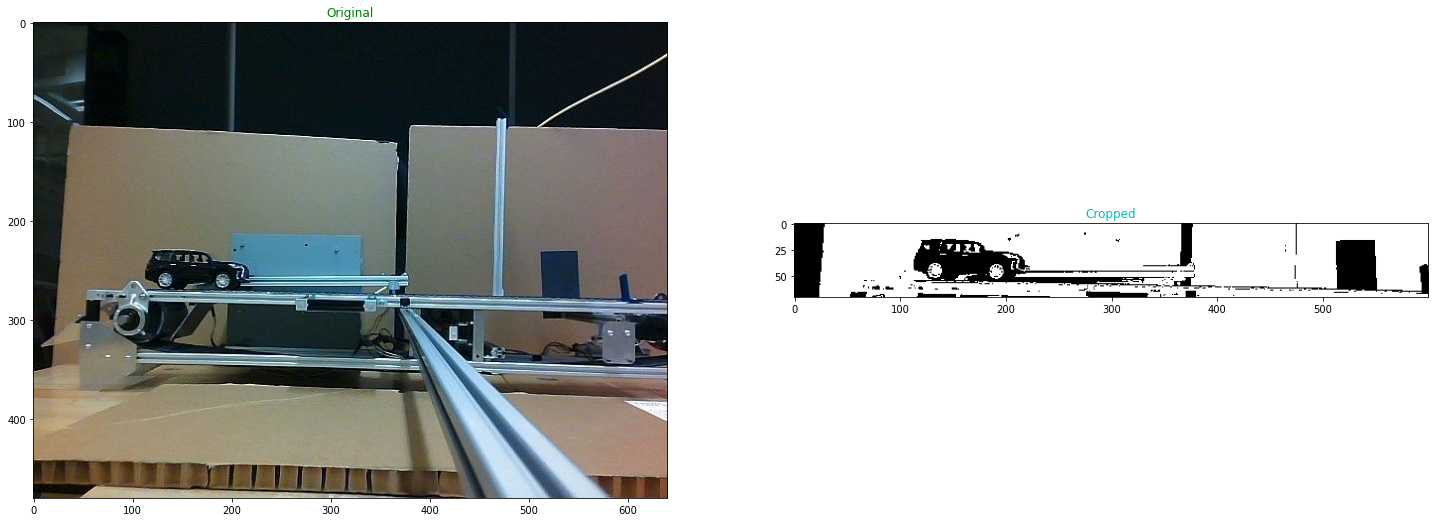

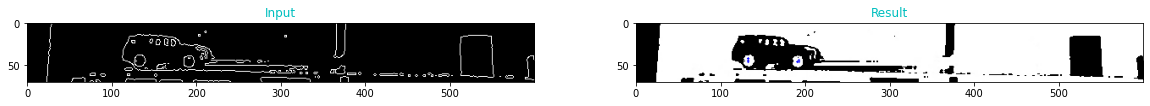

tensor([182,  36, 202,  56], dtype=torch.int32)
torch.Size([4])
torch.Size([1, 4])
tensor([182, 202,  36,  56], dtype=torch.int32)
torch.Size([4])
torch.Size([1, 4])


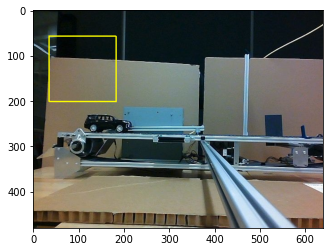

In [ ]:
coord = detect_circle(path_to_img = 'black_lexus_1.jpg')
max_x = coord[0]
max_y = coord[1]

# read input image
img = read_image('black_lexus_1.jpg')
x1 = max_x - 10
x2 = max_x + 10
y1 = max_y - 10
y2 = max_y + 10

# bounding box in (xmin, ymin, xmax, ymax) format
# top-left point=(xmin, ymin), bottom-right point = (xmax, ymax)
bbox = [x1,x2,y1,y2]
bbox = torch.tensor(bbox, dtype=torch.int)
print(bbox)
print(bbox.size())
bbox = bbox.unsqueeze(0)
print(bbox.size())

# draw bounding box on the input image
img=draw_bounding_boxes(img, bbox, width=3, colors=(255,255,0))

# transform it to PIL image and display
img = torchvision.transforms.ToPILImage()(img)
plt.imshow(img)

# Black Lexus 2

DatatypeClass of Image: <class 'numpy.ndarray'>
Shape/Size of RGB Img: (480, 640, 3)


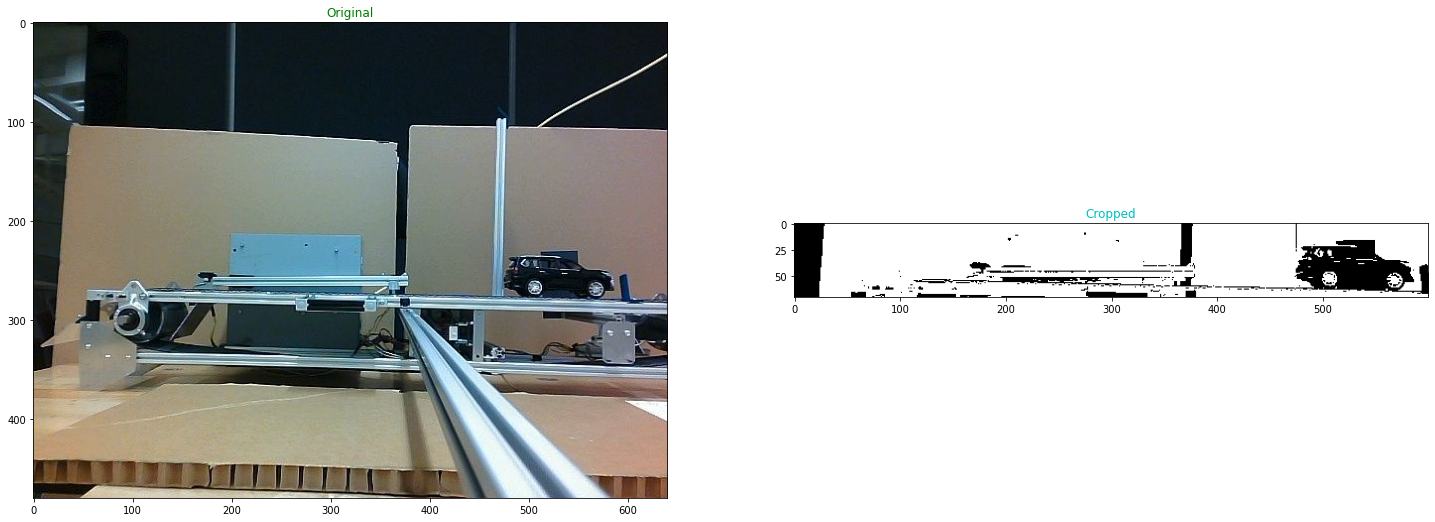

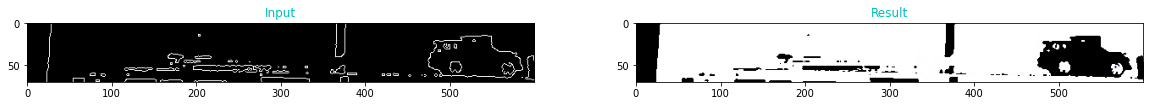

tensor([556,  42, 576,  62], dtype=torch.int32)
torch.Size([4])
torch.Size([1, 4])


(566, 52)

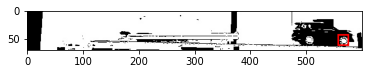

In [ ]:
detect_circle('black_lexus_2.jpg')

# Black Lexus 3

DatatypeClass of Image: <class 'numpy.ndarray'>
Shape/Size of RGB Img: (480, 640, 3)


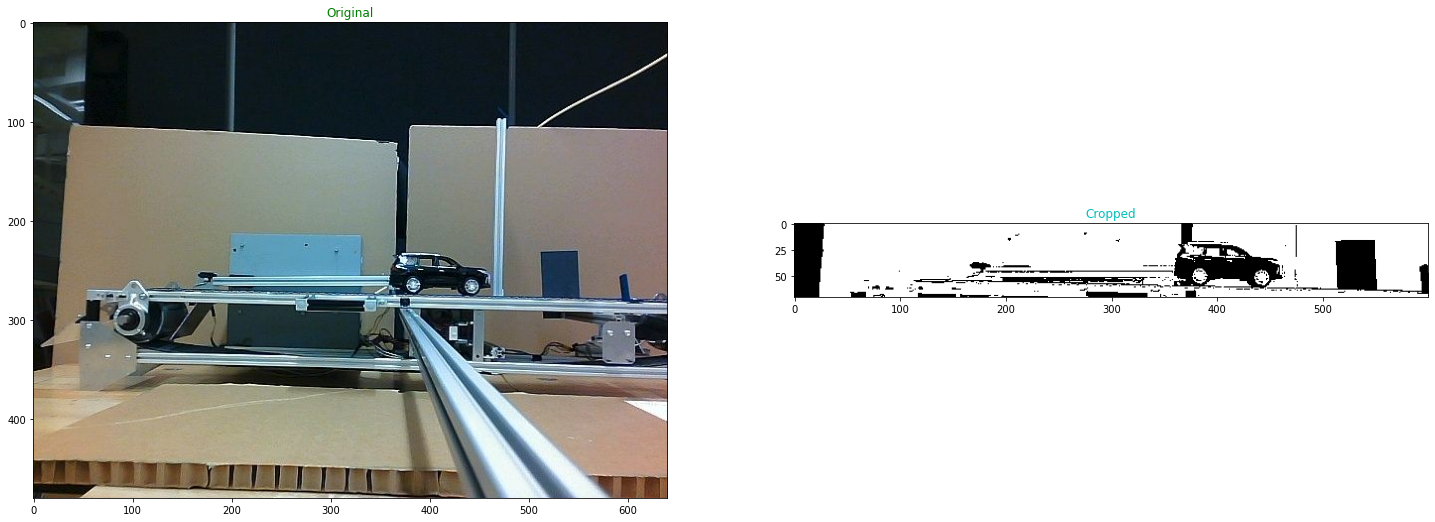

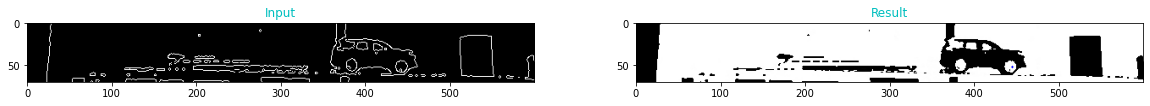

tensor([434,  42, 454,  62], dtype=torch.int32)
torch.Size([4])
torch.Size([1, 4])


(444, 52)

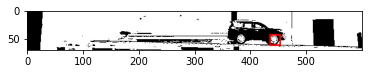

In [ ]:
detect_circle('black_lexus_3.jpg')

DatatypeClass of Image: <class 'numpy.ndarray'>
Shape/Size of RGB Img: (480, 640, 3)


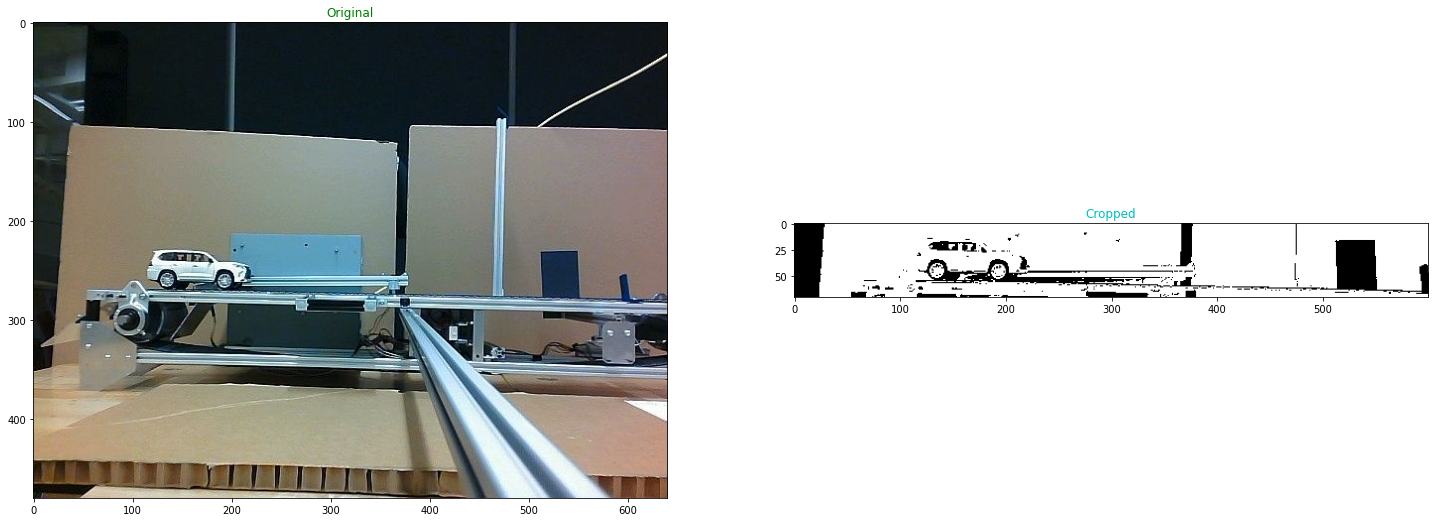

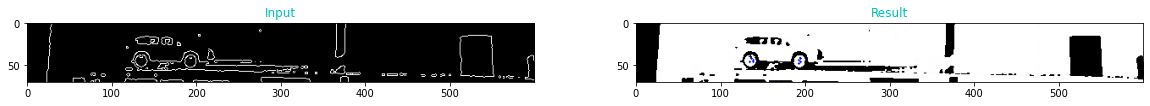

tensor([184,  60, 204,  80], dtype=torch.int32)
torch.Size([4])
torch.Size([1, 4])


(194, 70)

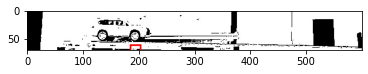

In [ ]:
detect_circle('white_lexus_1.jpeg')

# White Lexus 1 Print Image

DatatypeClass of Image: <class 'numpy.ndarray'>
Shape/Size of RGB Img: (480, 640, 3)


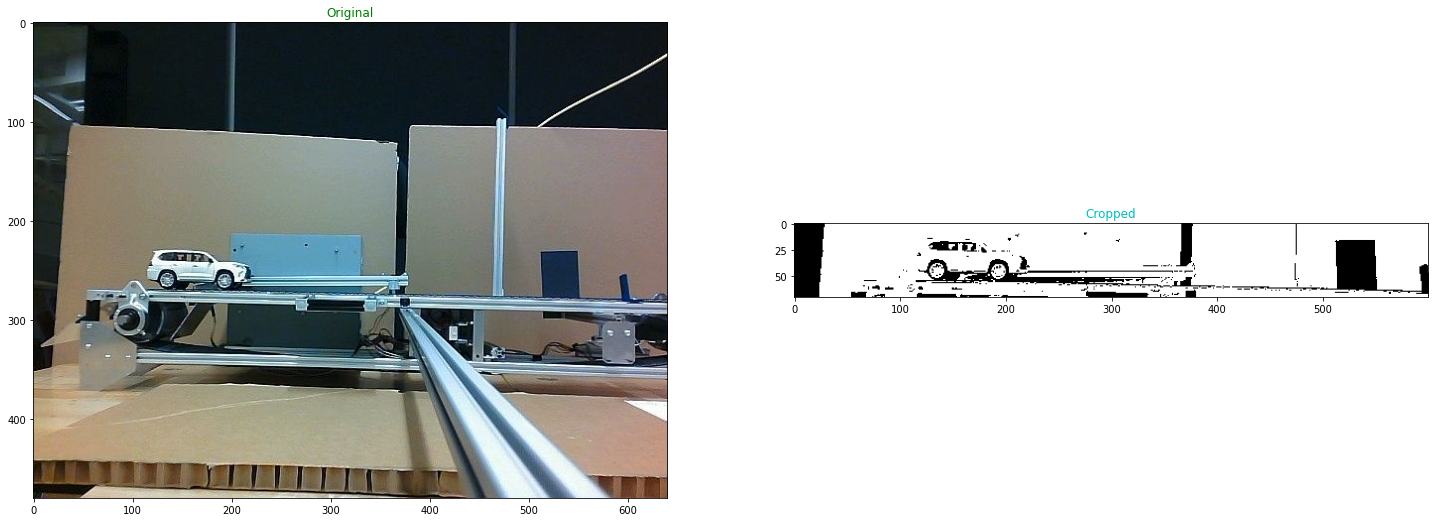

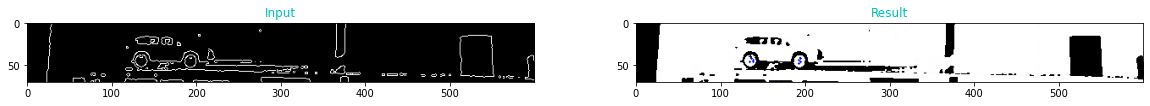

tensor([184,  60, 204,  80], dtype=torch.int32)
torch.Size([4])
torch.Size([1, 4])


(194, 70)

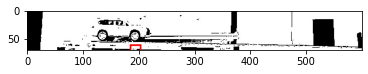

In [ ]:
detect_circle('white_lexus_1.jpeg')

DatatypeClass of Image: <class 'numpy.ndarray'>
Shape/Size of RGB Img: (480, 640, 3)


Text(0.5, 1.0, 'RGB Image')

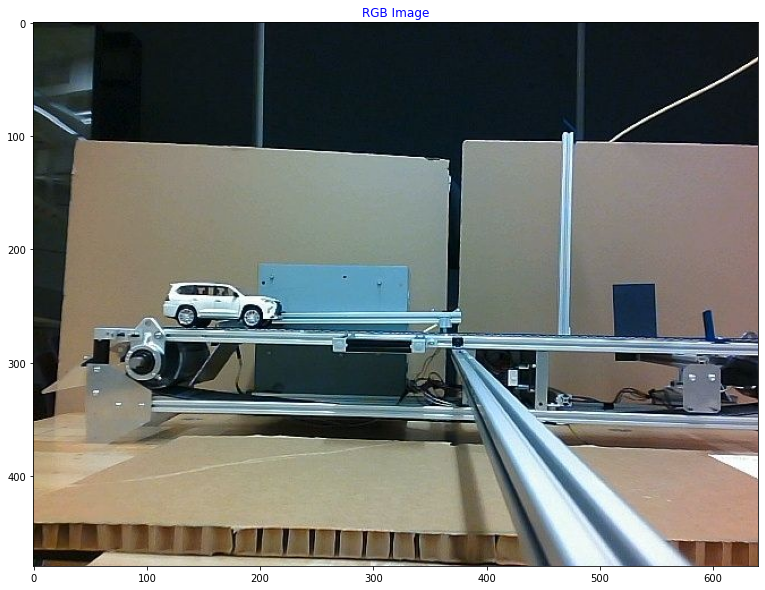

In [ ]:
MainImgBGR = cv2.imread('white_lexus_1.jpeg',cv2.IMREAD_UNCHANGED)

print('DatatypeClass of Image:',type(MainImgBGR))
print('Shape/Size of RGB Img:', MainImgBGR.shape)

plt.figure(figsize=(25,10))
#Note: matplotlib uses RGB format so had to convert BGR-to-RGB
plt.imshow(cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2RGB))
plt.title('RGB Image',color='b')

**White Lexus 1 Crop Image**

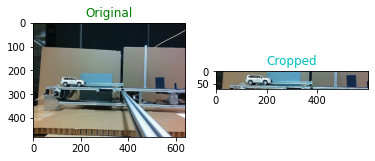

In [ ]:
#Crop Image

img = cv2.imread('white_lexus_1.jpeg',cv2.IMREAD_UNCHANGED)

#Slicing using ROI
cropped = img[215:285,0:600].copy()
plt.subplot(121),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Original',color='g')
plt.subplot(122),plt.imshow(cv2.cvtColor(cropped,cv2.COLOR_BGR2RGB)),plt.title('Cropped',color='c')

#Save cropped image
cv2.imwrite("whitecropped.jpg", cropped)
CropImgBGR = cv2.imread('whitecropped.jpg',cv2.IMREAD_UNCHANGED)

**Binarise Cropped White Image**

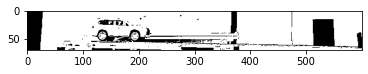

In [ ]:
# convert the image to grayscale format
img_gry = cv2.cvtColor(CropImgBGR,cv2.COLOR_BGR2GRAY)

# Otsu's thresholding
ret,img_Otsubin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# visualize the binary image
plt.imshow(img_Otsubin,cmap='gray')

# Save binarized cropped image
cv2.imwrite("bincropped2.jpg", img_Otsubin)
CropImgBin = cv2.imread('bincropped2.jpg',cv2.IMREAD_UNCHANGED)

**Circle Detector**

In [ ]:
path_to_img = 'bincropped2.jpg'

#Circle detection + coordinates of max x and y values
houghCircleDetector(path_to_img)
DetectedCircleCoordinates(path_to_img)

NameError: ignored

#White Lexus 2

DatatypeClass of Image: <class 'numpy.ndarray'>
Shape/Size of RGB Img: (480, 640, 3)


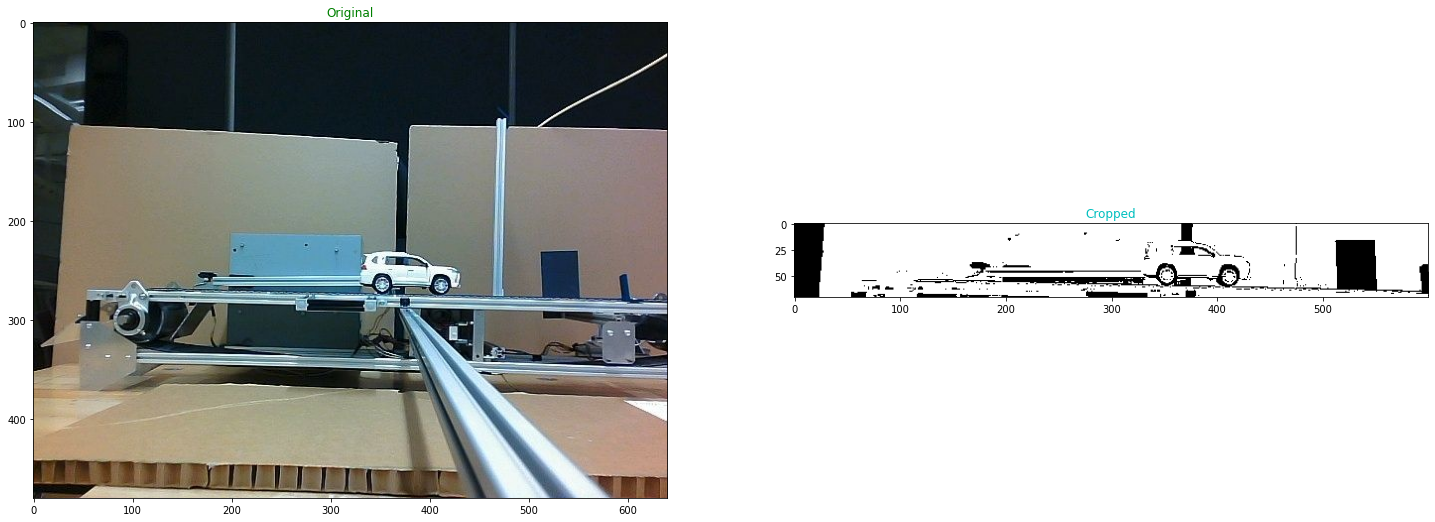

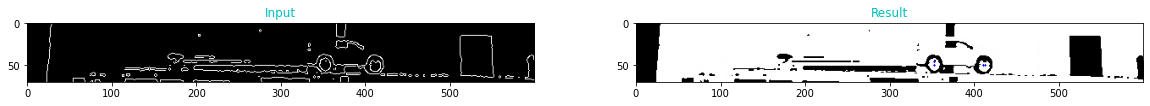

Maximum x = 412 Maximum y = 50


(412, 50)

In [ ]:
MainImgBGR = cv2.imread('white_lexus_2.jpeg',cv2.IMREAD_UNCHANGED)

print('DatatypeClass of Image:',type(MainImgBGR))
print('Shape/Size of RGB Img:', MainImgBGR.shape)

plt.figure(figsize=(25,10))
#Note: matplotlib uses RGB format so had to convert BGR-to-RGB
plt.imshow(cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2RGB))
plt.title('RGB Image',color='b')

#Crop Image

img = cv2.imread('white_lexus_2.jpeg',cv2.IMREAD_UNCHANGED)

#Slicing using ROI
cropped = img[215:285,0:600].copy()
plt.subplot(121),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Original',color='g')
plt.subplot(122),plt.imshow(cv2.cvtColor(cropped,cv2.COLOR_BGR2RGB)),plt.title('Cropped',color='c')

#Save cropped image
cv2.imwrite("whitecropped.jpg", cropped)
CropImgBGR = cv2.imread('whitecropped.jpg',cv2.IMREAD_UNCHANGED)

# convert the image to grayscale format
img_gry = cv2.cvtColor(CropImgBGR,cv2.COLOR_BGR2GRAY)

# Otsu's thresholding
ret,img_Otsubin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# visualize the binary image
plt.imshow(img_Otsubin,cmap='gray')

# Save binarized cropped image
cv2.imwrite("bincropped2.jpg", img_Otsubin)
CropImgBin = cv2.imread('bincropped2.jpg',cv2.IMREAD_UNCHANGED)

path_to_img = 'bincropped2.jpg'

#Circle detection + coordinates of max x and y values
houghCircleDetector(path_to_img)
DetectedCircleCoordinates(path_to_img)

#White Lexus 3

DatatypeClass of Image: <class 'numpy.ndarray'>
Shape/Size of RGB Img: (480, 640, 3)


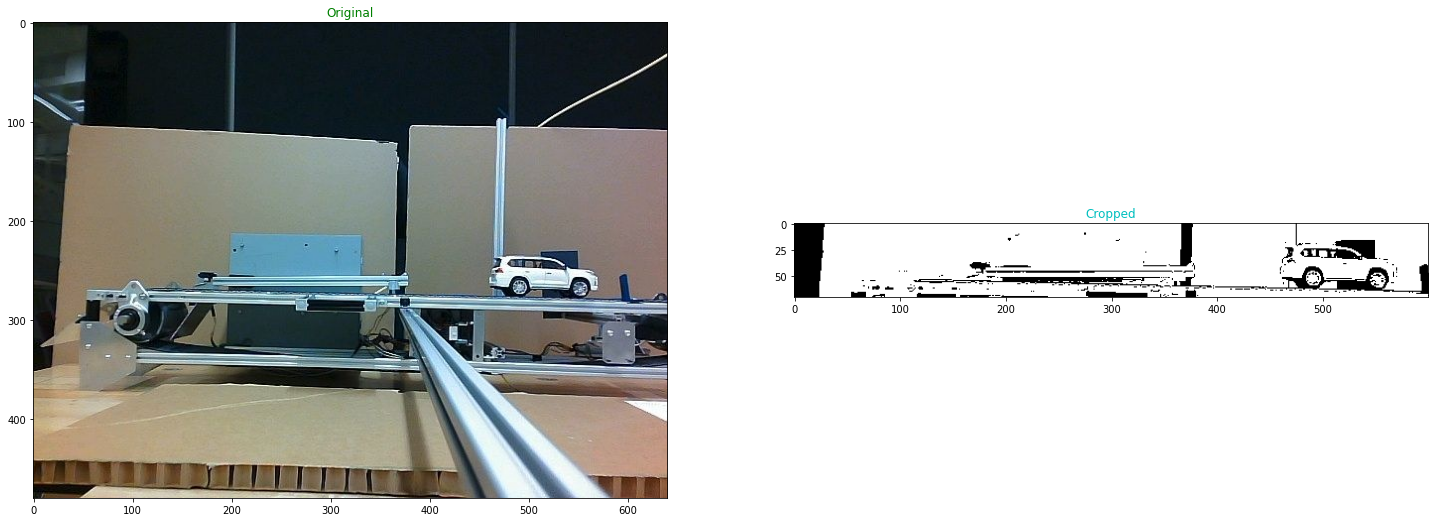

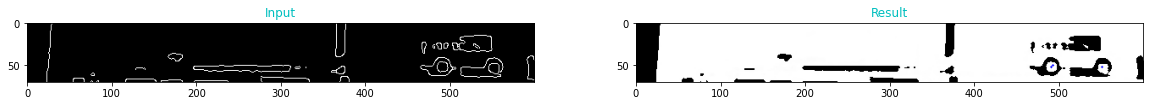

Maximum x = 550 Maximum y = 52


(550, 52)

In [ ]:
MainImgBGR = cv2.imread('white_lexus_3.jpeg',cv2.IMREAD_UNCHANGED)

print('DatatypeClass of Image:',type(MainImgBGR))
print('Shape/Size of RGB Img:', MainImgBGR.shape)

plt.figure(figsize=(25,10))
#Note: matplotlib uses RGB format so had to convert BGR-to-RGB
plt.imshow(cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2RGB))
plt.title('RGB Image',color='b')

#Crop Image

img = cv2.imread('white_lexus_3.jpeg',cv2.IMREAD_UNCHANGED)

#Slicing using ROI
cropped = img[215:285,0:600].copy()
plt.subplot(121),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Original',color='g')
plt.subplot(122),plt.imshow(cv2.cvtColor(cropped,cv2.COLOR_BGR2RGB)),plt.title('Cropped',color='c')

#Save cropped image
cv2.imwrite("whitecropped.jpg", cropped)
CropImgBGR = cv2.imread('whitecropped.jpg',cv2.IMREAD_UNCHANGED)

# convert the image to grayscale format
img_gry = cv2.cvtColor(CropImgBGR,cv2.COLOR_BGR2GRAY)

# Otsu's thresholding
ret,img_Otsubin = cv2.threshold(img_gry,200,499,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# visualize the binary image
plt.imshow(img_Otsubin,cmap='gray')

# Save binarized cropped image
cv2.imwrite("bincropped2.jpg", img_Otsubin)
CropImgBin = cv2.imread('bincropped2.jpg',cv2.IMREAD_UNCHANGED)

def houghCircleDetector_whitelexus3(path_to_img):
    img = cv2.imread(path_to_img)
    img = cv2.medianBlur(img,5)
    img_edge = cv2.Canny(img,100,200,apertureSize = 3,L2gradient = True)
    
    circles = cv2.HoughCircles(img_edge,cv2.HOUGH_GRADIENT,1,minDist=1,param1=200,param2=38, minRadius=-1, maxRadius=-1)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for val in circles[0,:]:
            cv2.circle(img,(val[0],val[1]),val[2],(255,0,0),2)

    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(cv2.cvtColor(img_edge,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.show()
    return

def DetectedCircleCoordinates_whitelexus3(path_to_img):
    img = cv2.imread(path_to_img)
    img = cv2.medianBlur(img,5)
    img_edge = cv2.Canny(img,100,200,apertureSize = 3,L2gradient = True)
    
    circles = cv2.HoughCircles(img_edge,cv2.HOUGH_GRADIENT,1,minDist=1,param1=200,param2=38, minRadius=-1, maxRadius=-1)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        x_coord = []
        y_coord = []
        for val in circles[0,:]:
            x_coord.append(val[0])
            y_coord.append(val[1])
        max_x = max(x_coord)
        max_y = max(y_coord)
        print('Maximum x =', max_x, 'Maximum y =', max_y)
        return(max_x, max_y)

path_to_img = 'bincropped2.jpg'

houghCircleDetector_whitelexus3(path_to_img)
DetectedCircleCoordinates_whitelexus3(path_to_img)

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
mkdir image_data

mkdir: cannot create directory ‘image_data’: File exists


In [ ]:
vidcap = cv2.VideoCapture('black_lexus_1.mp4')
success, image = vidcap.read()
count = 1
while success:
  cv2.imwrite("video_data/image_%d.jpg" % count, image)    
  success, image = vidcap.read()
  print('Saved image ', count)
  count += 1